
## Práctica 1: Introducción a `pandas`, `matplotlib`, `seaborn`

Por **Eduardo Graells-Garrido**, Barcelona Supercomputing Center (BSC). <eduardo.graells@bsc.es>

El objetivo de esta práctica es **mostrar el potencial de visualizar datos con estas herramientas** y **entregar una base para comenzar a experimentar**. Los detalles (los _por qué_ y los _cómo se hace_) los veremos en siguientes prácticas.
El enfoque que utilizaremos será el de **realizar preguntas a los datos y responderlas con visualización**. Por eso comenzamos en el alto nivel (`seaborn`) y desde ahí comenzamos a ver más detalles respecto al funcionamiento interno de las visualizaciones.

Esta es la tabla de contenidos de esta sesión:

* **Datos: La Encuesta Origen Destino de Santiago**. Cargaremos datos de la encuesta, disponible en el [Portal de Datos del Gobierno](http://datos.gob.cl/dataset/31682), en un DataFrame de `pandas`. Este dataset ya viene incluido en el módulo [`aves`](http://github.com/carnby/aves).
* **Preámbulo y Configuración**. Aquí cargaremos todo lo necesario en Python para ejecutar este notebook.
* **Carga de Datos y Descripción**. Veremos como cargar los datos de la encuesta con `aves` y veremos como están compuestos.
* `seaborn`. Utilizaremos las visualizaciones de alto nivel de seaborn para responder preguntas con los datos.
* `pandas`. Utilizaremos los métodos nativos de `pandas` para responder preguntas con los datos, en conjunto con operaciones de `pandas` sobre ellos.
* `matplotlib`. Utilizaremos los métodos de bajo nivel de `matplotlib` para crear y configurar gráficos.
* _Todo Revuelto_. Ejemplificaremos en un gráfico como podemos sacar provecho a las tres bibliotecas de manera simultánea, utilizando código de bajo y alto nivel.



Comencemos.

---

### Datos: La Encuesta Origen Destino de Santiago

La Encuesta Origen-Destino de Santiago  es el instrumento principal que utilizan las autoridades para tomar decisiones respecto a transporte en la ciudad. Se recolectó por última vez el año 2012. Consistió en entrevistar a los residentes de más de 18000 hogares haciéndoles la siguiente pregunta: 

> ¿Cuáles viajes hiciste ayer?

Las personas encuestadas llenaron un _diario de viaje_, que incluyó todos los datos pertinentes de la rutina del día anterior: a qué hora iniciaron cada viaje, a qué hora terminaron, los lugares de origen y destino (coordenadas), el propósito del viaje, el/los modo(s) de viaje utilizados, etc. También se incluye información socio-demográfica de cada persona que vive en el hogar correspondiente.

Suena bien, ¿no? Es un _dataset_ que contiene datos de todo tipo: cualitativos, cuantitativos, geográficos. Se pueden responder muchas preguntas relevantes para la sociedad. Ahora bien, antes de seguir con el código en este notebook, tengan en cuenta las siguientes consideraciones:

  1. **Hay que diferenciar análisis de personas encuestadas de análisis de población**. La encuesta asigna un _factor_ o _peso_ a cada persona, a cada hogar, y a cada viaje. Estos pesos indican la representatividad de cada una de estas unidades de análisis. Por ejemplo, un viaje que es común (ir a trabajar desde A hasta B en metro) tendrá mayor peso que un viaje poco frecuente (hacer un trabajo para la universidad).
  1. **La encuesta es representativa a nivel comunal**. La cantidad de hogares encuestados y el peso de cada observación permite hacer un análisis fidedigno para cada comuna, o bien para la ciudad completa Esto quiere decir que podemos sacar conclusiones sobre como se moviliza la población de Providencia, pero no de un barrio específico de la comuna. Puede ser que exista información de ese barrio específico, pero no podemos sacar conclusiones reales puesto que la cantidad de encuestas en ese barrio no es suficiente.
  
Por tanto, **los análisis presentados en este curso son explorativos e ilustrativos, pero no son representativos**. En algunos casos sí consideraremos los factores de las muestras, pero aún así hay que tener cuidado a la hora de interpretar los resultados.
  
---

### Preámbulo y Configuración

En un notebook usualmente se cargan todos los módulos y bibliotecas en el comienzo del notebook. Esto permite conocer rápidamente los requerimientos que tiene y también tener una idea de lo que se hará en él. 

Si tienes problemas cargando alguna de las bibliotecas mencionadas aquí, recuerda instalar el environment del módulo `aves`.

Primero, cargamos el módulo `eod` que facilita la carga de los datos.

In [1]:
from aves.data import eod

Luego cagamos las bibliotecas que utilizaremos. `pandas` y `seaborn` trabajan sobre `matplotlib`. Esta última es enorme, particularmente cargaremos el submódulo `pyplot` que contiene métodos que nos permitirán manipular los gráficos.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# numpy es una biblioteca de bajo nivel, sobre la que construye pandas. 
#la utilizaremos en la sección de matplotlib
import numpy as np
# adjusttext es una biblioteca para.. ajustar texto en una visualización. 
#la utilizaremos en el último ejemplo del notebook.
from adjustText import adjust_text
# ésta es una función utilitaria para dataframes.
from aves.features.utils import normalize_rows

Las siguientes líneas configuran el notebook y la apariencia de las visualizaciones:

In [3]:
# esto le indica a Jupyter que los gráficos generados se desplieguen dentro del notebook
%matplotlib inline

# si utilizan una pantalla de alta resolucion (4K, retina, etc.) esto duplica la calidad de imagen
%config InlineBackend.figure_format = 'retina'

# esto configura la apariencia de los gráficos: tamaños de letra, bordes, colores base, etc.
sns.set(context='paper', font='Fira Code', style='ticks', palette='twilight', font_scale=1.1)

---

### Carga de Datos y Descripción

El módulo `aves` tiene tres métodos que se encargan de cargar los datos: `read_people` (tabla de personas), `read_homes` (tabla de hogares)  y `read_trips` (tabla de viajes).

In [4]:
personas = eod.read_people()
personas.head()

,Hogar,Persona,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,...,TramoIngreso,IngresoFinal,TramoIngresoFinal,IngresoImputado,Factor_LaboralNormal,Factor_SabadoNormal,Factor_DomingoNormal,Factor_LaboralEstival,Factor_FindesemanaEstival,FactorPersona
0,100010,10001001,1958,Hombre,Jefe(a) de Hogar,2,3,2,2,4.0,...,Entre 200.001 y 400.000 pesos,240000,2,0,NaN,NaN,1668.2600,NaN,NaN,82.58553
1,100010,10001002,1956,Mujer,Cónyuge o pareja,5,1,2,2,5.0,...,NaN,0,0,0,NaN,NaN,852.1137,NaN,NaN,99.53422
2,100010,10001003,1982,Mujer,Hijo o Hija,0,1,2,2,7.0,...,Entre 200.001 y 400.000 pesos,210845,2,2,NaN,NaN,1609.1630,NaN,NaN,151.59367
3,100020,10002001,1954,Hombre,Jefe(a) de Hogar,4,3,2,2,4.0,...,Menos de 200.000 pesos,133000,1,0,169.50230,NaN,NaN,NaN,NaN,45.21325
4,100020,10002002,1961,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,Menos de 200.000 pesos,193000,1,0,43.26765,NaN,NaN,NaN,NaN,25.62248


¿Cuántas variables tiene esta tabla? Usaremos el método `info` de `pandas`.

In [5]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60054 entries, 0 to 60053
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hogar                      60054 non-null  int64  
 1   Persona                    60054 non-null  int64  
 2   AnoNac                     60054 non-null  int64  
 3   Sexo                       60054 non-null  object 
 4   Relacion                   60054 non-null  object 
 5   Viajes                     60054 non-null  int64  
 6   LicenciaConducir           60054 non-null  object 
 7   PaseEscolar                60054 non-null  int64  
 8   AdultoMayor                60054 non-null  int64  
 9   Estudios                   59932 non-null  float64
 10  Curso                      59932 non-null  float64
 11  Actividad                  57969 non-null  object 
 12  Ocupacion                  25586 non-null  object 
 13  ActividadEmpresa           25586 non-null  flo

Algunas variables cualitativas están codificadas como números. ¿Cuáles? Más adelante en el curso hablaremos de las diferencias entre atributos cuantitativos (`int64`, `float64`) y los cualitativos (`int64`). 

Ahora carguemos los hogares:

In [6]:
hogares = eod.read_homes()
hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18264 entries, 0 to 18263
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hogar         18264 non-null  int64  
 1   Sector        18264 non-null  object 
 2   Zona          18264 non-null  int64  
 3   Comuna        18264 non-null  object 
 4   DirCoordX     18264 non-null  float64
 5   DirCoordY     18264 non-null  float64
 6   Fecha         18264 non-null  object 
 7   DiaAsig       18264 non-null  object 
 8   TipoDia       18264 non-null  int64  
 9   Temporada     18264 non-null  int64  
 10  NumPer        18264 non-null  int64  
 11  NumVeh        18264 non-null  int64  
 12  NumBicAdulto  18264 non-null  int64  
 13  NumBicNino    18264 non-null  int64  
 14  Propiedad     18264 non-null  int64  
 15  MontoDiv      2081 non-null   float64
 16  ImputadoDiv   18264 non-null  int64  
 17  MontoArr      18264 non-null  int64  
 18  ImputadoArr   18264 non-nu

Y, finalmente, los viajes:

In [7]:
viajes = eod.read_trips()
viajes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113455 entries, 0 to 113590
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Hogar                     113455 non-null  int64          
 1   Persona                   113455 non-null  int64          
 2   Viaje                     113455 non-null  int64          
 3   Etapas                    113455 non-null  int64          
 4   ComunaOrigen              111267 non-null  object         
 5   ComunaDestino             111142 non-null  object         
 6   SectorOrigen              111485 non-null  object         
 7   SectorDestino             111402 non-null  object         
 8   ZonaOrigen                113455 non-null  int64          
 9   ZonaDestino               113455 non-null  int64          
 10  OrigenCoordX              93715 non-null   float64        
 11  OrigenCoordY              93715 non-null   float64  

En algunos análisis querremos mezclar estas tablas. `pandas` nos faciltia la vida gracias al método `merge`:

In [8]:
personas_hogar = personas.merge(hogares)
personas_hogar.shape

(60054, 59)

In [9]:
viajes_persona_hogar = viajes.merge(personas).merge(hogares)
viajes_persona_hogar.shape

(113455, 96)

Los siguientes pasos serán responder preguntas de la población con estos datos.

---

### `seaborn`

Esta biblioteca es de alto nivel --- es decir, implementa visualizaciones a las que le _declaramos_ lo que queremos hacer. No implementamos el _cómo hacerlo_, sino más bien le decimos _qué queremos_. Ejemplifiquemos esto con algunas preguntas.

#### ¿Dónde están los hogares entrevistados?

La primera pregunta que podemos hacer busca entender quiénes han sido entrevistados. Observamos que cada hogar tiene coordenadas x e y, entonces, podemos utilizar una visualización básica para mostrar directamente x e y de cada hogar.

`seaborn` cuenta con el método `scatterplot`, o _gráfico de dispersión_. En una línea de código podemos hacer lo siguiente:

<AxesSubplot:xlabel='DirCoordX', ylabel='DirCoordY'>

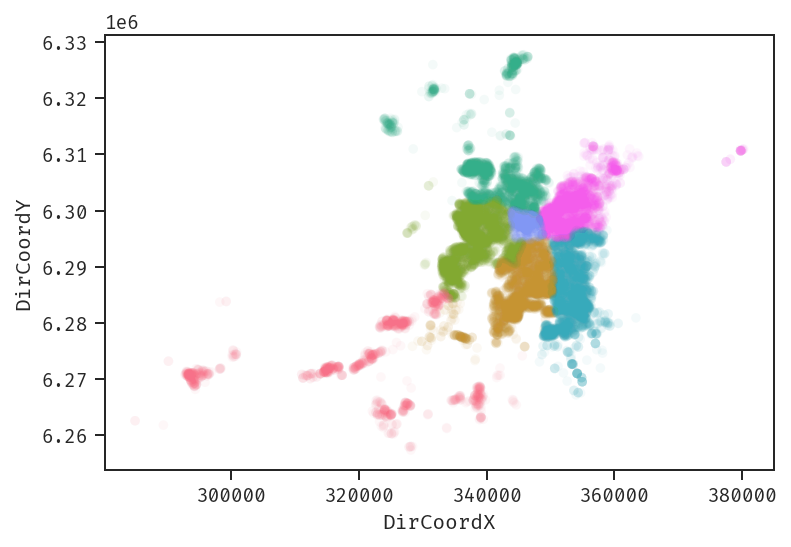

In [10]:
sns.scatterplot(x='DirCoordX', y='DirCoordY', data=hogares, alpha=0.05, hue='Sector', legend=False, edgecolor='none')

Si bien `pandas` y `matplotlib` también tienen sus propios métodos de gráficos de dispersión, `seaborn` permite especificar maneras de desagregar los datos. Aquí, le hemos dicho que pinte cada hogar con un color correspondiente al sector de Santiago (o de la RM) al que pertenece (`hue='Sector'`).

Veremos más sobre visualización de datos geográficos en la clase de mapas. 

#### ¿Cuál es la distribución de edad de las personas encuestadas? 

Sin visualización podemos utilizar el método `describe` que calcula estadística descriptiva simple para tener una primera aproximación de la respuesta:

In [11]:
personas['AnoNac'].describe()

count    60054.000000
mean      1975.421920
std         22.189995
min       1904.000000
25%       1959.000000
50%       1977.000000
75%       1994.000000
max       2013.000000
Name: AnoNac, dtype: float64

Sin embargo, uno podría tener más preguntas implícitas. ¿Cuándo nació más gente? ¿Cuál es la forma de la distribución?¿Tiene forma de campana?¿Es bimodal?

Podemos utilizar el método `distplot` (_distribution plot_) que se encarga de mostrarnos la distribución:

<AxesSubplot:xlabel='AnoNac'>

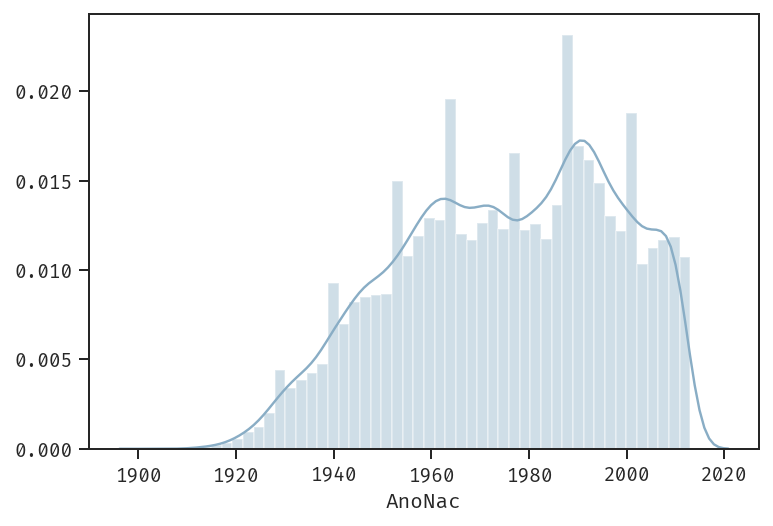

In [12]:
sns.distplot(personas['AnoNac'])

En una línea de código tenemos un gráfico doble: un _histograma_ más una distribución aproximada utilizando [_Kernel Density Estimation_ (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation). Eso es alto nivel: se abstrae la respuesta a nuestra pregunta en el código. No tenemos que decirle al sistema _cómo_ queremos que se visualice, le decimos cuál es el tipo de respuesta que necesitamos.

Pregunta: ¿qué es el eje y? La respuesta está en el nombre de _KDE_.

#### ¿Cuál es la cantidad de hogares encuestados por comuna?

Esta pregunta también es directa de responder con métodos de `pandas`. El método `value_counts` se encarga de contar las veces que un valor aparece en una columna. En este caso, el nombre de cada comuna en la columna correspondiente de la tabla de hogares:

In [13]:
hogares['Comuna'].value_counts()

PUENTE ALTO            1662
MAIPU                  1466
LA FLORIDA             1039
SANTIAGO                998
LAS CONDES              888
SAN BERNARDO            762
PUDAHUEL                630
ÑUÑOA                   603
QUILICURA               570
LA PINTANA              545
PROVIDENCIA             502
PEÑALOLEN               489
EL BOSQUE               415
RECOLETA                385
RENCA                   344
ESTACION CENTRAL        331
CONCHALI                310
CERRO NAVIA             306
LA GRANJA               304
PEDRO AGUIRRE CERDA     296
MACUL                   279
QUINTA NORMAL           278
LA REINA                272
SAN MIGUEL              265
COLINA                  259
VITACURA                254
SAN JOAQUIN             244
MELIPILLA               236
HUECHURABA              235
LO BARNECHEA            234
LA CISTERNA             229
LO PRADO                228
INDEPENDENCIA           225
PEÑAFLOR                225
SAN RAMON               217
CERRILLOS           

Ahora bien, si quisiéramos responder subpreguntas como "¿cuál es la proporción entre el primer lugar y el segundo?," entonces tendríamos que dividir los números que vemos en la tabla. Usando visualización eso es más sencillo, porque nuestro sistema visual se encarga de aproximar el resultado (reemplazando _cognición_ por _percepción_):

El método `catplot` (_categorical plot_) nos permite expresar la operación de la siguiente manera:

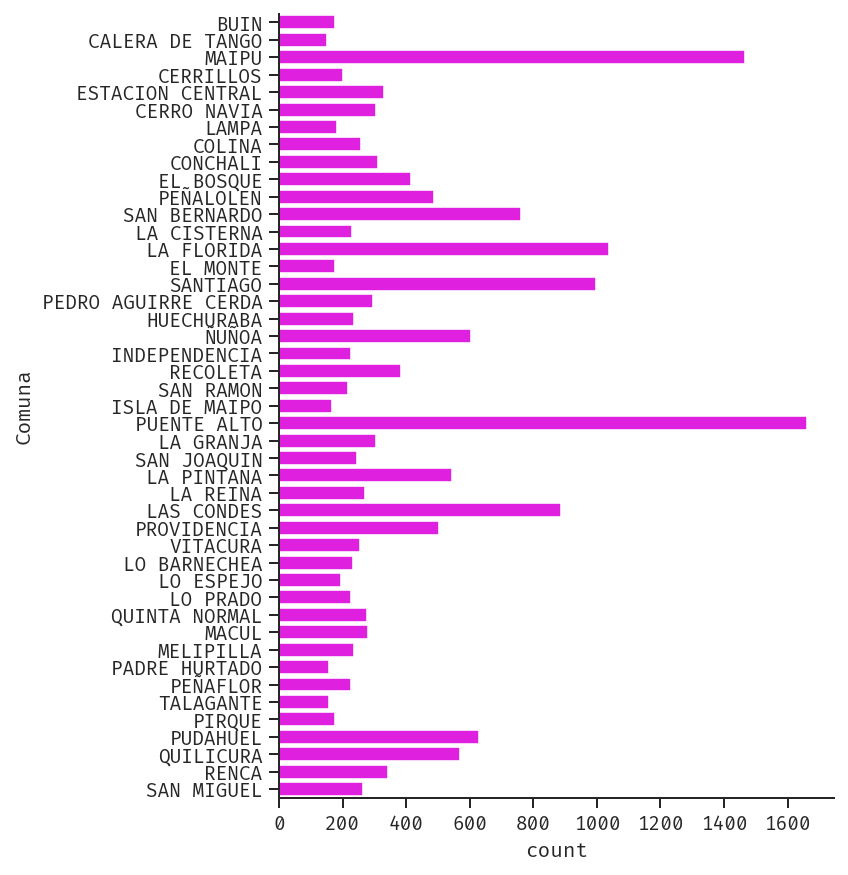

In [14]:
sns.catplot(y='Comuna', data=hogares, kind='count', height=6, color='magenta')

Incorporamos dos opciones que configurar la apariencia del gráfico: `height` (altura del gráfico) y el color de las barras que se utilizaron. Después veremos que el parámetro `kind` permite especificar distintos tipos de gráficos categóricos.

#### ¿Cuáles son los tipos de viaje y cuánto duran?

Si queremos saber cuáles son, podemos utilizar el método `unique`:

In [15]:
viajes['Proposito'].unique()

array(['volver a casa', 'Al trabajo', 'Visitar a alguien', 'De compras',
       'Buscar o Dejar a alguien', 'Al estudio',
       'Otra actividad (especifique)', 'Recreación', 'Trámites',
       'Por trabajo', 'De salud', 'Por estudio', 'Buscar o dejar algo',
       'Comer o Tomar algo', nan], dtype=object)

Aunque esa respuesta no es informativa. Posiblemente une quiere saber la duración de los viajes, y también la variabilidad de ésta duración.

En `pandas` podemos hacer esto con una operación `groupby` por _propósito de viaje_ más una agregación de los tiempos de viaje que calcule el promedio y la desviación estándar:

In [16]:
(viajes
 .groupby('Proposito')
 .agg(duracion=('TiempoViaje', 'mean'), 
      variabilidad=('TiempoViaje', 'std')
 )
)

,duracion,variabilidad
Proposito,,
Al estudio,33.026819,27.972250
Al trabajo,51.073052,41.780269
Buscar o Dejar a alguien,22.259995,22.967926
Buscar o dejar algo,21.147287,21.837120
Comer o Tomar algo,16.062319,15.737705
De compras,17.656084,20.490586
De salud,40.297502,30.007604
Otra actividad (especifique),33.181965,47.566722
Por estudio,38.308225,46.979551


_Nota_: suelo dejar las operaciones de `pandas` en líneas separadas (por eso los paréntesis al inicio y al final), porque así podemos hacer pruebas rápidamente y es fácil de leer.

Este resultado nos muestra en una tabla los números. Sin embargo, ya es más difícil de ver, al tener dos columnas. Por otro lado, la desviación estándar no es necesariamente una métrica de variabilidad adecuada, ya que nada asegura que la distribución de los valores de tiempo de viaje sea gaussiana.

Anteriormente probamos `catplot` con una variable cualitativa, de la que _contamos_ sus valores (`kind='count'`). Ahora analizaremos una variable cuantitativa, de la que veremos su promedio y el rango del intervalo del 95% de confianza, estimado utilizando _bootstrapping_:

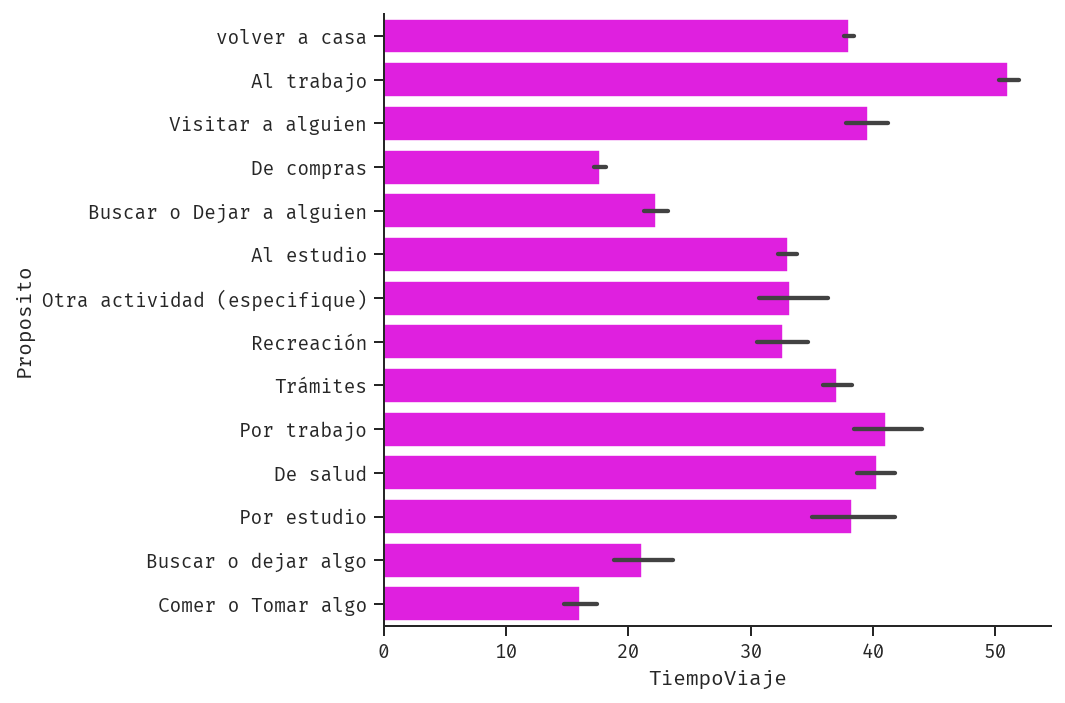

In [17]:
sns.catplot(y='Proposito', x='TiempoViaje', kind='bar', ci=99, data=viajes, color='magenta', aspect=1.5)

El viaje al trabajo es el que toma más tiempo -- algo esperable. Al trabajo tenemos que ir esté donde esté.

El método es configurable para utilizar otras medidas de tendencia, como la media, o para utilizar otras medidas de dispersión, incluyendo la desviación estándar. Lo exploraremos en la clase de visualización de tablas. 

#### ¿Cuáles son los roles en el hogar de acuerdo al sexo de las personas?

La encuesta incluye este tipo de información. El método `value_counts` de `pandas` nuevamente puede ser útil:

In [18]:
personas['Relacion'].value_counts()

Hijo o Hija                       22225
Jefe(a) de Hogar                  18262
Cónyuge o pareja                  11435
Otro pariente                      7564
No familiar                         359
Trabajadora de casa particular      203
Pensionista                           6
Name: Relacion, dtype: int64

Esto es coherente con la distribución de edad que vimos antes. Ahora bien, lo interesante seria desagregar estos valores por el sexo de las personas. Para ello podemos utilizar la operación `groupby` de `pandas`:

In [19]:
personas.groupby(['Sexo', 'Relacion']).size()

Sexo    Relacion                      
Hombre  Cónyuge o pareja                   1431
        Hijo o Hija                       11231
        Jefe(a) de Hogar                  11905
        No familiar                         171
        Otro pariente                      3627
        Pensionista                           4
        Trabajadora de casa particular        6
Mujer   Cónyuge o pareja                  10004
        Hijo o Hija                       10994
        Jefe(a) de Hogar                   6357
        No familiar                         188
        Otro pariente                      3937
        Pensionista                           2
        Trabajadora de casa particular      197
dtype: int64

¡Ya no es tan fácil comparar entre roles y sexos! Esta misma operación también la puede hacer `catplot`. Así como antes le pedíamos que contara valores, ahora le podemos pedir que separe grupos, y que distinga grupos distintos utilizando colores. De ahí que la variable de tonalidad reciba el nombre de la columna que queremos utilizar para desagregar (`hue='Sexo'`). Queda así:

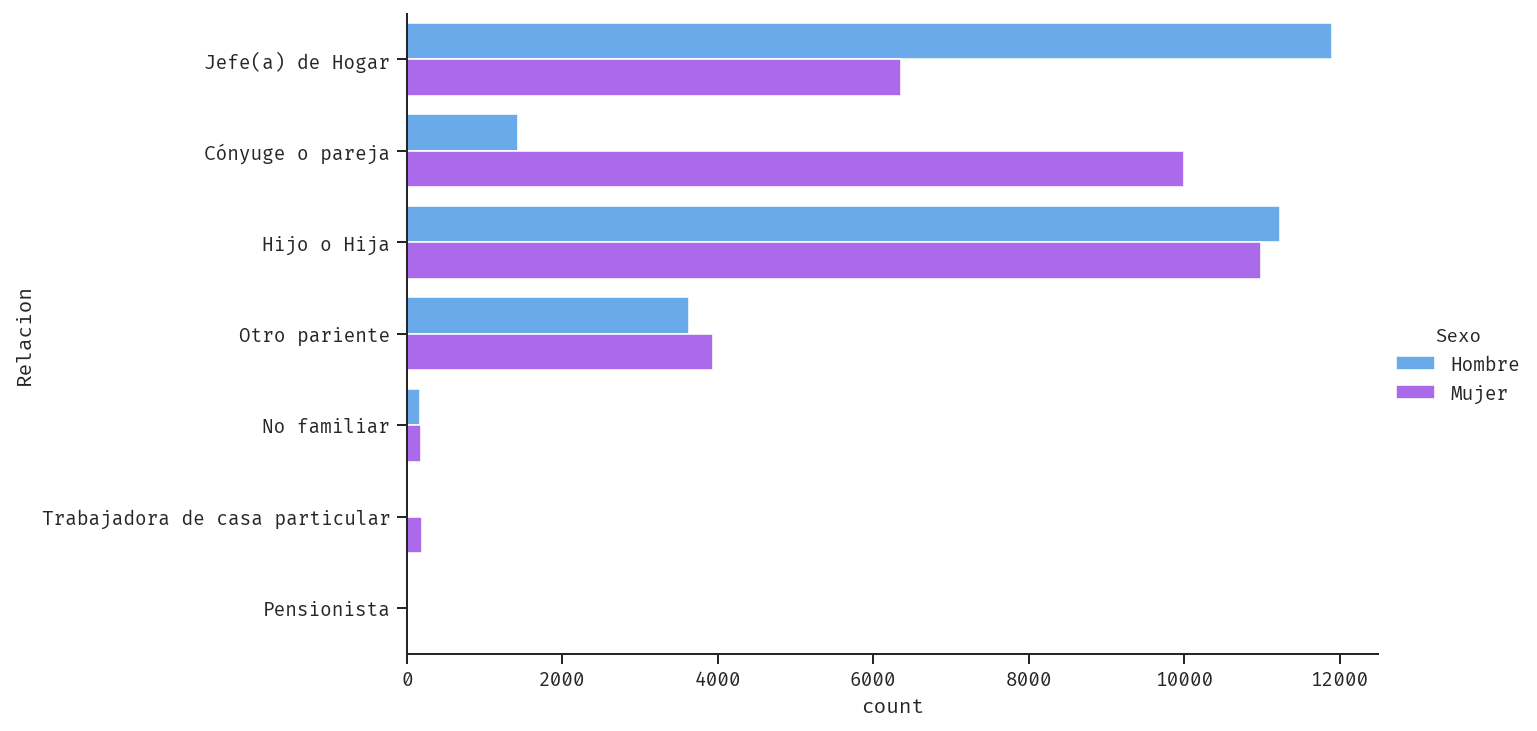

In [20]:
sns.catplot(y='Relacion', data=personas, hue='Sexo', palette='cool', kind='count', aspect=2)

Esto ya se ve más interesante y más poderoso que mostrar los números directamente, ¿no? Podemos empezar a _preguntar_ cosas adicionales a los datos, que vayan un poco más allá de nuestra pregunta inicial. Por ejemplo, al combinar las variables `Relacion` y `Sexo` notamos que los hombres suelen identificarse como jefes de hogar y las mujeres como cónyuge en proporciones distintas a las de otros roles dentro del hogar.

#### ¿Hay diferencias de ingreso por ocupación y sexo?

Esta pregunta es similar a la anterior, pero esta vez la desagregación la hacemos para estudiar una variable cuantitativa: el ingreso de las personas.

Primero, veamos las ocupaciones disponibles en el dataset:

In [21]:
personas['Ocupacion'].value_counts()

Empleado u obrero del sector privado                               17314
Trabajador por cuenta propia                                        4880
Enpleado u obrero de empresas públicas                               968
Servicio doméstico puertas afuera                                    745
Empleado u obrero del sector público (Gob. Central o Municipal)      672
Patrón o empleador                                                   613
Servicio doméstico puertas adentro                                   251
FF.AA. Y del Orden                                                   124
Familiar no remunerado                                                19
Name: Ocupacion, dtype: int64

Podemos calcular un promedio utilizando `groupby`:

In [22]:
personas.groupby('Ocupacion').agg(ingreso=('Ingreso', 'mean'))

,ingreso
Ocupacion,
Empleado u obrero del sector privado,119986.165646
Empleado u obrero del sector público (Gob. Central o Municipal),159170.049107
Enpleado u obrero de empresas públicas,145143.098140
FF.AA. Y del Orden,214185.556452
Familiar no remunerado,36073.473684
Patrón o empleador,79111.796085
Servicio doméstico puertas adentro,67670.577689
Servicio doméstico puertas afuera,98306.367785
Trabajador por cuenta propia,91295.739344


Lo mismo podemos hacer para la variable sexo:

In [23]:
personas.groupby('Sexo').agg(ingreso=('Ingreso', 'mean'))

,ingreso
Sexo,
Hombre,76726.105833
Mujer,40526.569431


¡Son valores muy bajos! Primero, notemos que una persona puede tener ingreso 0 (por ser menor de edad, o tener trabajo no remunerado), o bien por no tener una ocupación. Por mientras, enfoquémonos en quienes tienen ocupación y son mayores de edad:

In [24]:
personas[(pd.notnull(personas['Ocupacion'])) & (personas['AnoNac'] <= 1995)].shape

(25545, 39)

In [25]:
(personas[pd.notnull(personas['Ocupacion']) & (personas['AnoNac'] <= 1995)]
 .groupby('Sexo')
 .agg(ingreso=('Ingreso', 'mean'))
)

,ingreso
Sexo,
Hombre,127323.500620
Mujer,96065.474594


Podemos hacer el análisis con un `groupby` que reciba dos columnas de agrupación:

In [26]:
(personas[pd.notnull(personas['Ocupacion']) & (personas['AnoNac'] <= 1995)]
 .groupby(['Sexo', 'Ocupacion'])
 .aggregate(ingreso=('Ingreso', 'mean'))
)

ingreso
Sexo   Ocupacion                                                        
Hombre Empleado u obrero del sector privado                130602.597302
       Empleado u obrero del sector público (Gob. Cent...  179202.628319
       Enpleado u obrero de empresas públicas              168727.354767
       FF.AA. Y del Orden                                  259245.680412
       Familiar no remunerado                               20019.800000
       Patrón o empleador                                   96756.608076
       Servicio doméstico puertas adentro                  115049.500000
       Servicio doméstico puertas afuera                   138794.550000
       Trabajador por cuenta propia                        103365.145436
Mujer  Empleado u obrero del sector privado                101611.347440
       Empleado u obrero del sector público (Gob. Cent...  138776.522523
       Enpleado u obrero de empresas públicas              124569.597679
       FF.AA. Y del Orden                                   52302.888889
       Familiar no remunerado                               41806.928571
       Patrón o empleador                                   40421.869792
       Servicio doméstico puertas adentro                   64444.778723
       Servicio doméstico puertas afuera                    97189.452414
       Trabajador por cuenta propia                         72310.128587

Nos topamos con el mismo problema de la pregunta anterior, ya es una tabla difícil de analizar. Probemos ver como se ve con `catplot`. Probemos con dos configuraciones distintas:

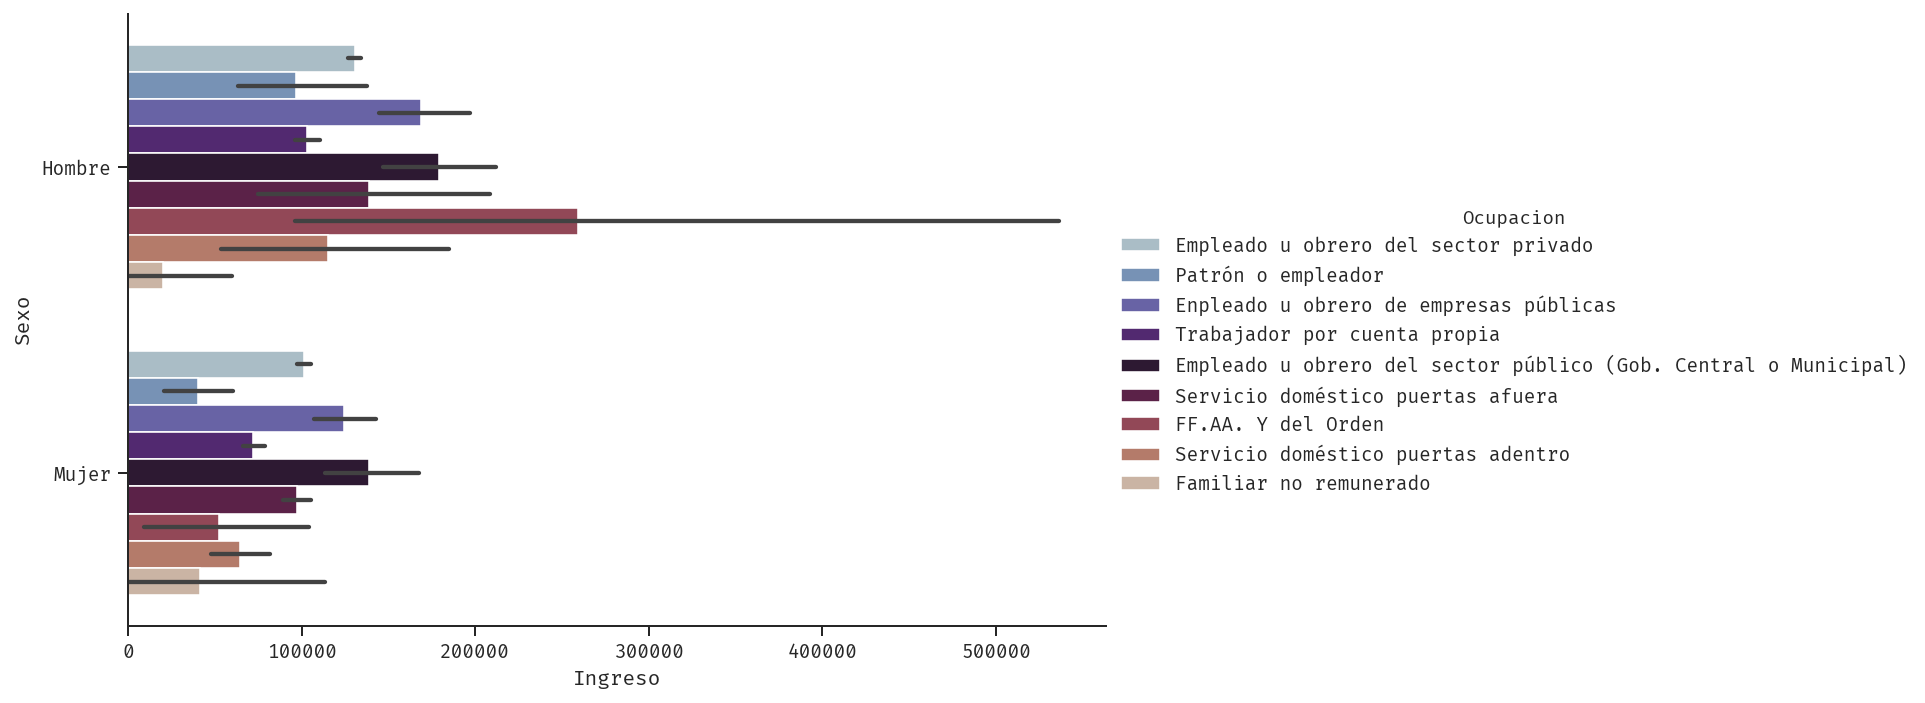

In [27]:
sns.catplot(x='Ingreso', y='Sexo', hue='Ocupacion', 
               data=personas, aspect=1.7, palette='twilight', kind='bar')

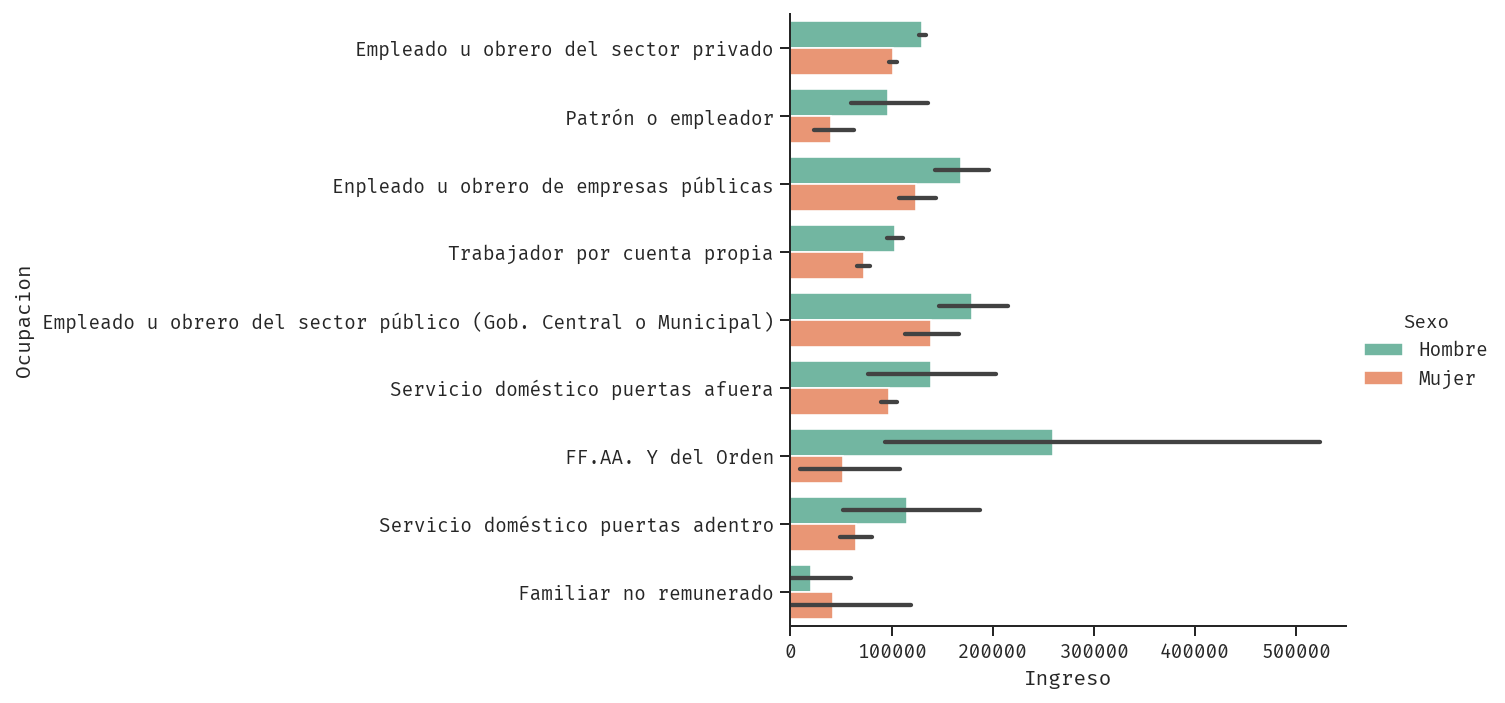

In [28]:
sns.catplot(x='Ingreso', hue='Sexo', y='Ocupacion', 
               data=personas, aspect=2, palette='Set2', kind='bar')

¿Cuál alternativa les parece mejor? La primera permite ver para cada sexo cuál es la ocupación que genera más ingresos. La segunda permite comparar la brecha de ingreso en cada ocupación.

Como pueden ver, en ambos casos el código es prácticamente igual, excepto por la apariencia (la paleta de colores -`palette`- o el ancho de la imagen -`aspect`-). Lo que sí es relevante es cual variable se utiliza como `y` y cual como `hue`.

Llama la atención la alta variabilidad de los resultados. Por eso, podemos utilizar el mismo `catplot` para conocer el tamaño de la muestra: 

/home/egraells/miniconda3/envs/aves/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


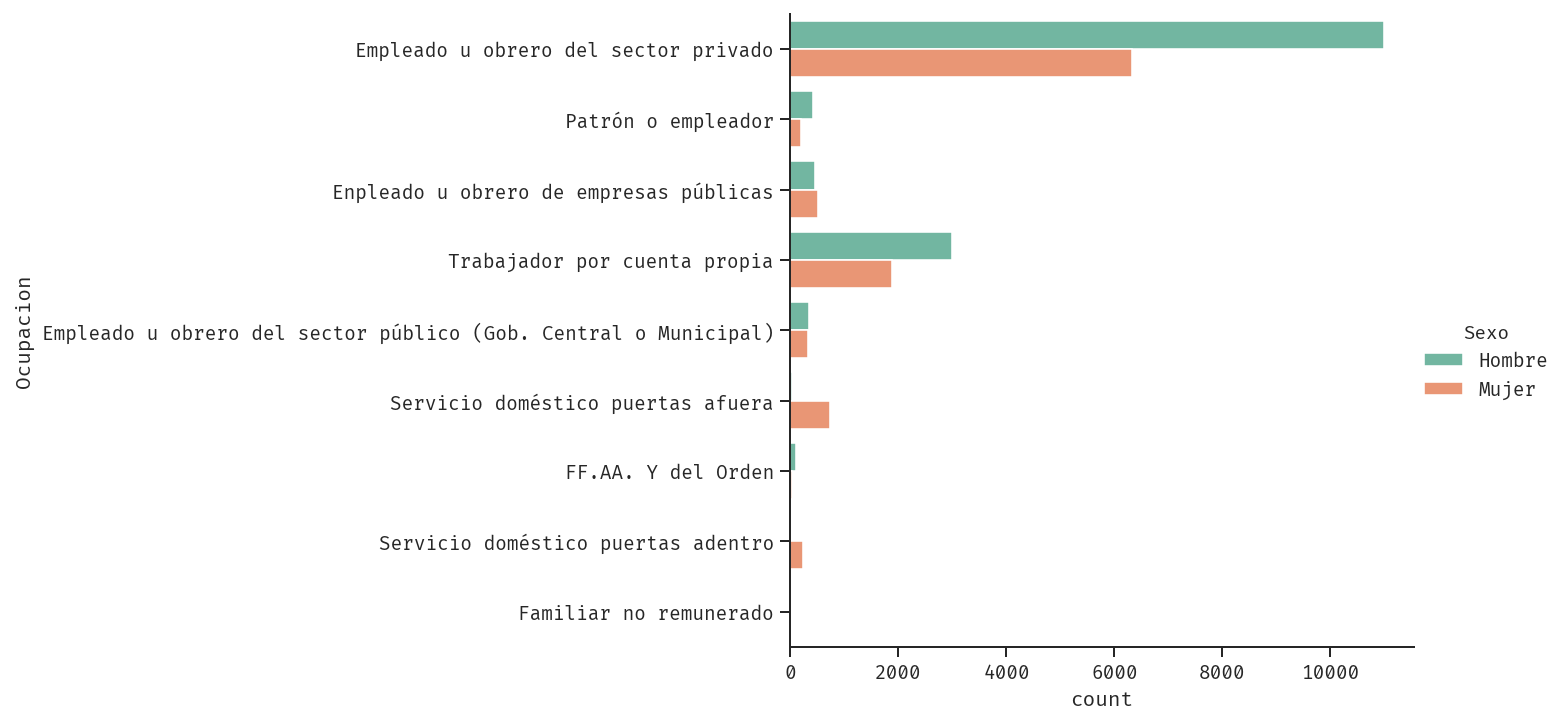

In [29]:
sns.catplot(y='Ocupacion', hue='Sexo', data=personas, palette='Set2', kind='count')

Eso lo explica: algunas categorías tienen tan pocas muestras, que la variabilidad es enorme.

`seaborn` es una biblioteca flexible con muchas técnicas de visualización. Lo que hemos visto hasta ahora es solo una pequeña parte de todo lo que ofrece. El resto lo veremos a lo largo del curso. Ahora bien, aquí intentamos utilizar `seaborn` directamente. En la siguiente sección veremos como podemos usar `pandas`, y en ocasiones, `seaborn`, para que trabajen juntas en hacer visualizaciones.

### `pandas`

Este curso asume que ya hicieron un curso de análisis de datos con `pandas`, en el que ya han adquirido herramientas básicas de lectura, manipulación y despliegue de datos.

Entonces, es posible que sepan que en `pandas` podemos hacer un _histograma_, un gráfico de barras donde cada una de ellas codifica la cantidad de muestras en un rango específico. Lo hacemos con el método `plot.hist`. Revisitemos la variable de año de nacimiento:

<AxesSubplot:ylabel='Frequency'>

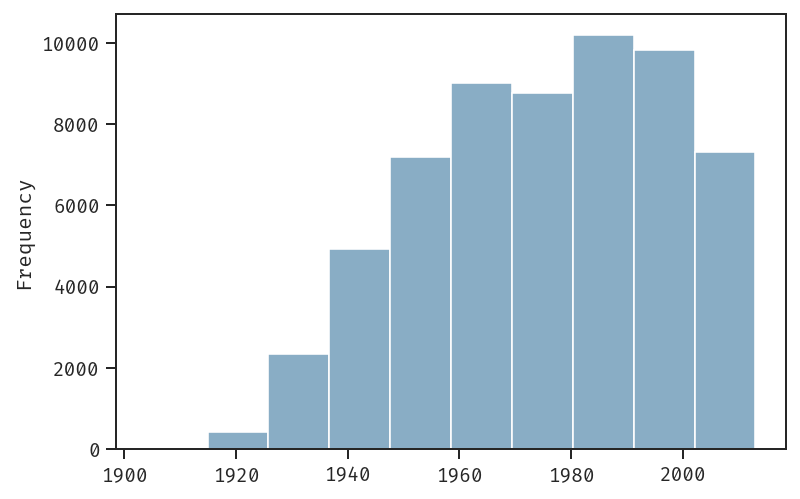

In [30]:
personas['AnoNac'].plot.hist()

¿Por qué quisiéramos utilizar este método en vez de `distplot` de `seaborn`? `distplot` hacía más cosas, como calcular automáticamente un número adecuado de _bins_.

La respuesta es que queremos saber la distribución real de la población, y para ello necesitamos ver el _factor de expansión_ de cada persona. Y el histograma de `pandas` permite incluir esta variable en el parámetro `weights`:

In [31]:
personas['FactorPersona'].describe()

count    60054.000000
mean       110.762561
std        189.334891
min          0.520320
25%         30.848183
50%         56.320710
75%        112.439810
max       3112.450440
Name: FactorPersona, dtype: float64

<AxesSubplot:ylabel='Frequency'>

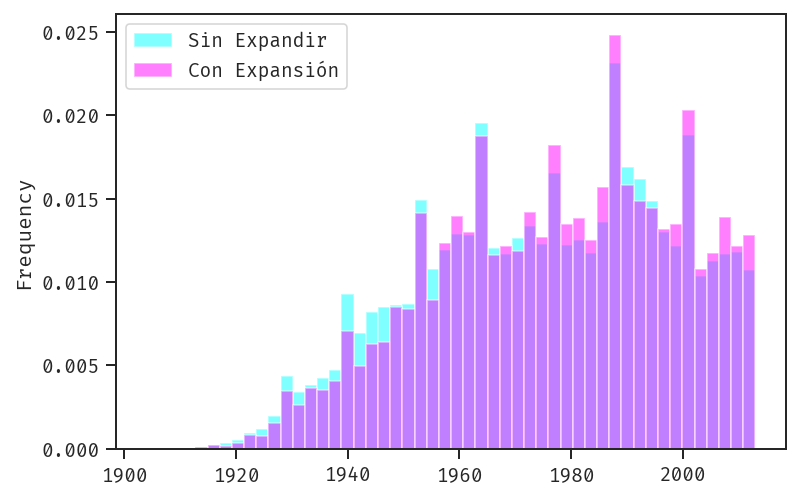

In [32]:
personas['AnoNac'].plot.hist(bins=50, alpha=0.5, density=True, color='cyan', label='Sin Expandir', legend=True)
personas['AnoNac'].plot.hist(bins=50, alpha=0.5, density=True, color='magenta', label='Con Expansión', weights=personas['FactorPersona'], legend=True)

Hemos utilizado la opción `density=True` para que los dos histogramas sean comparables. De otro modo, uno sería mucho más grande que el otro en términos de magnitud de las barras, ya que se considera el total de la población.

Otro motivo para hablar de ambas bibliotecas colaborando se refiere a tener que responder preguntas más complejas que las anteriores, que requieren análisis de datos.

#### ¿Cuáles son las horas del día más asociadas a cada propósito de viaje?¿Son iguales para hombres y mujeres?

Para responder a esta pregunta debemos inspeccionar la columna `HoraIni` de la tabla de viajes:

In [33]:
viajes['HoraIni'].describe()

count                       113455
mean     0 days 13:35:26.242827552
std      0 days 04:39:18.560453238
min                0 days 00:00:00
25%                0 days 09:10:00
50%                0 days 13:30:00
75%                0 days 17:30:00
max                0 days 23:59:00
Name: HoraIni, dtype: object

Esta variable es de un tipo de dato que en general es complicado de graficar. De hecho, la siguiente línea no funcionará:

<AxesSubplot:xlabel='HoraIni'>

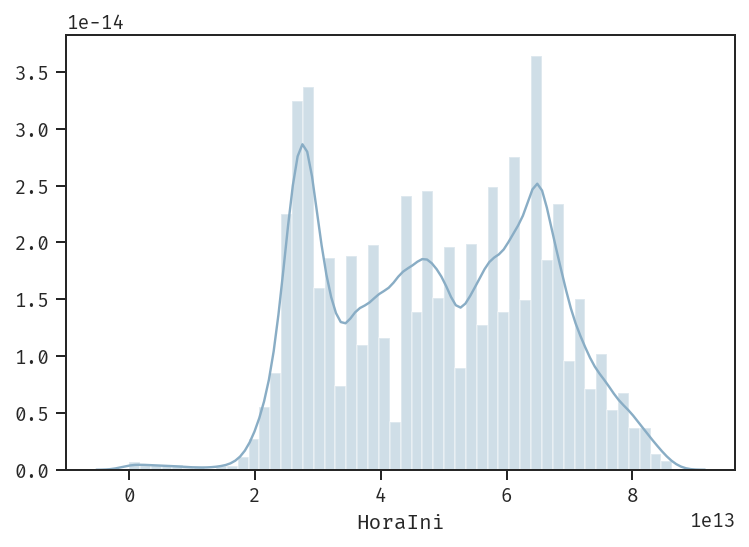

In [34]:
sns.distplot(viajes_persona_hogar['HoraIni'])

¿Qué son los números en el eje x y en el eje y? En el eje x se ve el número con el que el sistema representa una fecha (es enorme, por eso se le agrega el exponente `1e13`). El eje y tiene la densidad de los viajes, que es pequeñisima debido a la distribución en el eje x. Está bien que la densidad sea pequeña, no es realmente relevante su valor -- más bien es su distribución lo que nos interesa. Pero los valores de `HoraIni` no los podemos interpretar.

Los métodos que grafican datos en general no suelen estar preparados para variables temporales. Pero `pandas` nos permite facilitar ese trabajo ayudándonos a convertir esos valores en datos numéricos utilizando la división por `pd.Timedelta`.

Por ejemplo, si tenemos un valor que dice `23:30` y lo dividimos por `pd.Timedelta(hours=1)`, obtendremos como resultado `23.5`. Probemos:

In [35]:
viajes_persona_hogar['HoraDeInicio'] = viajes_persona_hogar['HoraIni'] / pd.Timedelta(hours=1)

<AxesSubplot:xlabel='HoraDeInicio'>

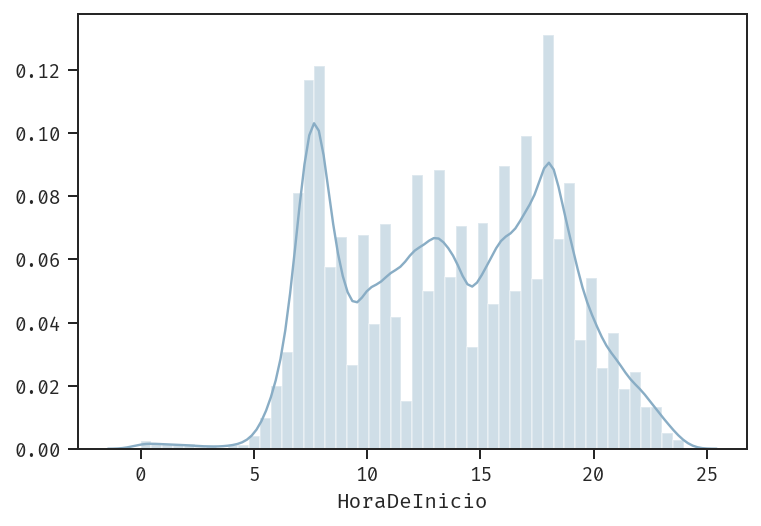

In [36]:
sns.distplot(viajes_persona_hogar['HoraDeInicio'])

¡Funciona! Personalmente, me gusta este estilo de gráfico, ya que muestra tanto singularidades de los datos como una distribución continua. Las distribuciones se pueden comparar entre sí, y eso permite hacer cálculos analíticos. 

Por otro lado, se dificulta la interpretación, puesto que el eje Y contiene _densidades_, no _cantidades_. Entonces, dependiendo de lo que queramos observar, también dependerá el tipo de gráfico a utilizar. 

Sigamos intentando responder la pregunta. Ahora necesitamos obtener los propósitos de viaje. Podemos hacerlo con `value_counts`:

In [37]:
n_propositos = viajes_persona_hogar['Proposito'].value_counts()
n_propositos

volver a casa                   52294
Al trabajo                      18372
De compras                      11092
Al estudio                       8470
Trámites                         4096
Buscar o Dejar a alguien         4080
Visitar a alguien                3734
Recreación                       3185
De salud                         2246
Otra actividad (especifique)     1854
Por trabajo                      1649
Por estudio                      1176
Comer o Tomar algo                690
Buscar o dejar algo               516
Name: Proposito, dtype: int64

Antes vimos que cuando hay pocas observaciones las distribuciones se distorsionan, por ejemplo, presentando una alta variabilidad. Queremos evitar eso en este análisis. Por tanto, consideraremos solamente los propósitos con más de 2500 viajes. Lo podemos hacer así en `pandas`:

In [38]:
n_propositos[n_propositos > 2500].index

Index(['volver a casa', 'Al trabajo', 'De compras', 'Al estudio', 'Trámites',
       'Buscar o Dejar a alguien', 'Visitar a alguien', 'Recreación'],
      dtype='object')

Ahora utilizaremos una opción de `seaborn` que permite desagregar no solo por tono (`hue`) sino también por _múltiples gráficos_, creando una _grilla_ (`FacetGrid`) de gráficos:

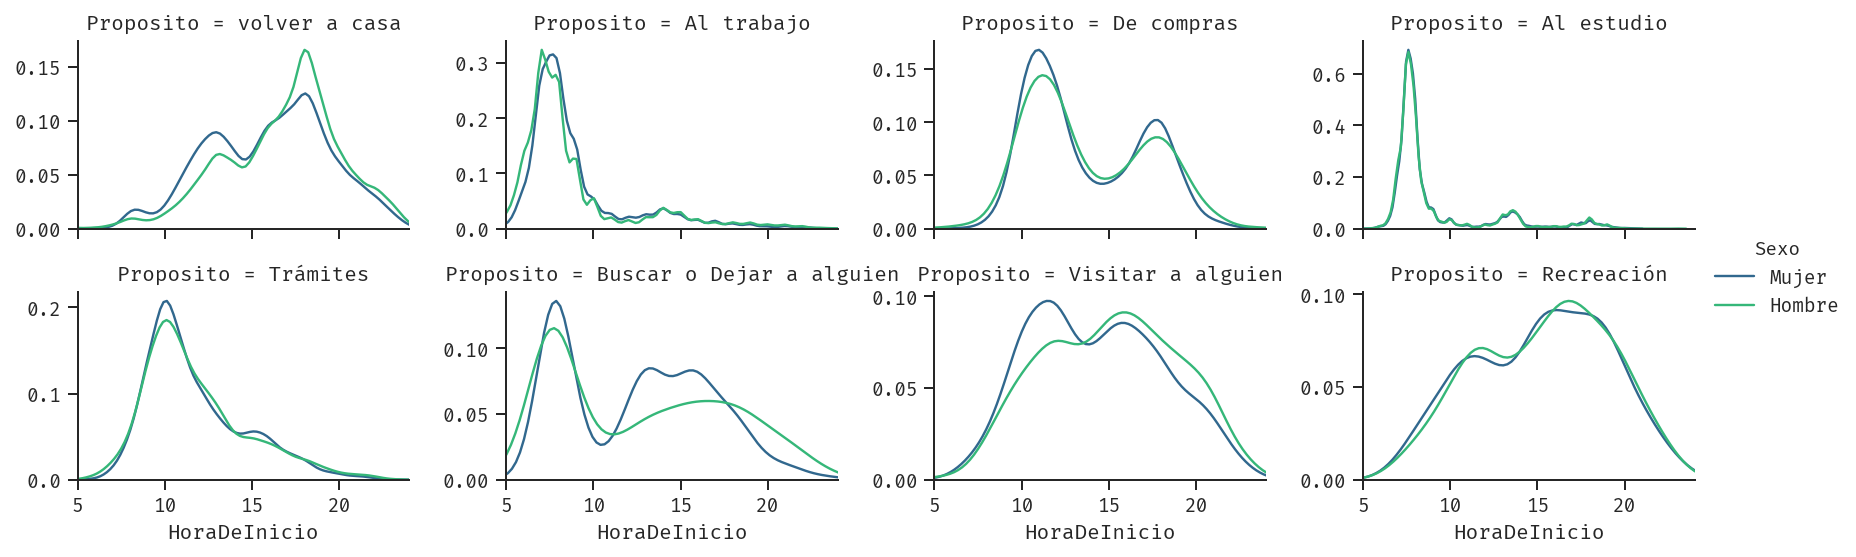

In [39]:
# creamos la grilla. el parámetro data le dice cuál es el dataframe a utilizar
grid = sns.FacetGrid(data=viajes_persona_hogar, 
                  # hue tiene el mismo significado de antes.
                  hue='Sexo', 
                  # col implica que cada columna será para un propósito distinto de viaje
                  # con un máximo de 4 columnas. si hay más, se crea una fila nueva
                  col='Proposito', col_wrap=4, 
                  # los propósitos se grafican en este orden.
                  # usamos la lista que vimos en la celda anterior
                  col_order=n_propositos[n_propositos > 2500].index,
                  # éstos son parámetros de apariencia.
                  # sharey es nuevo: significa que los gráficos no comparten la escala
                  # en el eje y
                  aspect=1.5, height=2,
                  sharey=False, palette='viridis')

# con esto le decimos que en cada gráfico aplique sns.distplot
# sobre la variable HoraDeInicio del dataframe
# además le pedimos que solamente grafique la KDE
grid.map(sns.distplot, 'HoraDeInicio', hist=False)

# mostrar solamente entre las 5 y 24 horas
grid.set(xlim=[5,24])

# agrega la leyenda para identificar los colores
grid.add_legend()

Hay muchas diferencias interesantes. Les invito a encontrar historias para contar en este gráfico :)

Si bien este gráfico se hizo con métodos de `seaborn`, tuvimos que hacer preprocesamientos y análisis con `pandas` ajenos a `FacetGrid` y a `distplot`.

Ahora sigamos bajando en la curva de abstracción, y utilicemos las instrucciones de bajo nivel de `matplotlib`.

### `matplotlib`

¡Esta biblioteca ya es tradicional en Python! 

Imaginemos que queremos hacer un gráfico desde cero. Así es como se vería en `matplotlib`:

Text(0, 0.5, 'Eje y')

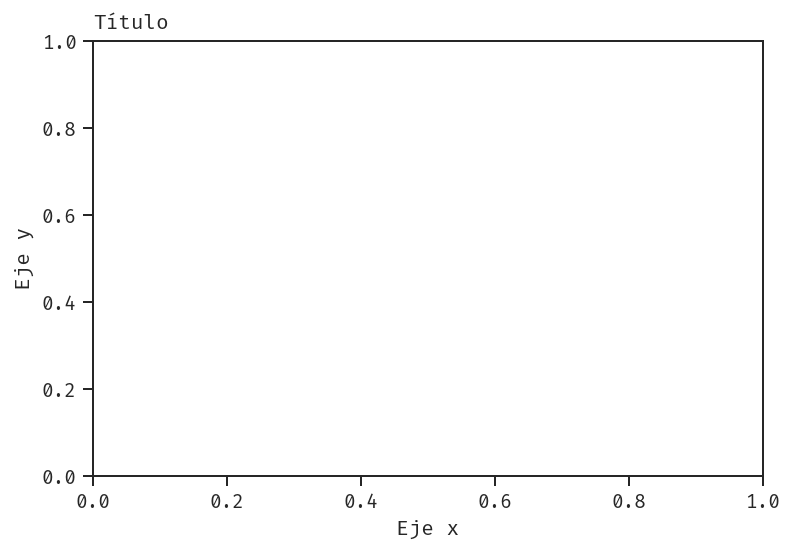

In [40]:
# esto crea el área de visualización. un lienzo. 
# se descompone en figura + una grilla de 1x1.
fig, ax = plt.subplots(1, 1)
# las siguientes instrucciones configuran las etiquetas del eje principal (ax) de la grilla
ax.set_title('Título', loc='left')
ax.set_xlabel('Eje x')
ax.set_ylabel('Eje y')

Usemos una función para crear una curva a graficar:

In [41]:
test_x = np.linspace(-5, 5, num=50)
test_y = np.cos(test_x)

Y ahora grafiquemos la fórmula con el método `plot`:

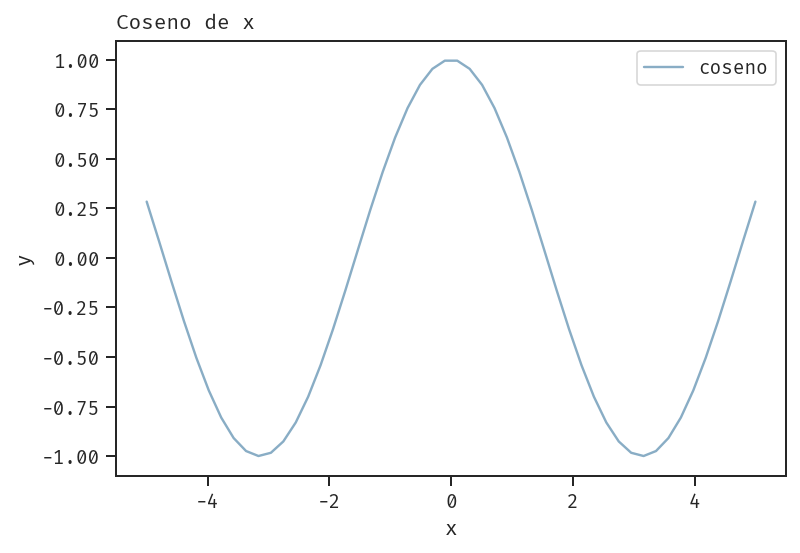

In [42]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_x, test_y, '-', label='coseno')
ax.set_title('Coseno de x', loc='left')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

La imagen no difiere visualmente de lo que hemos visto antes. Esto se debe a que `seaborn` y `pandas` utilizan `matplotlib` internamente para implementar sus visualizaciones.

Podemos utilizar el método `plot` cuantas veces queramos:

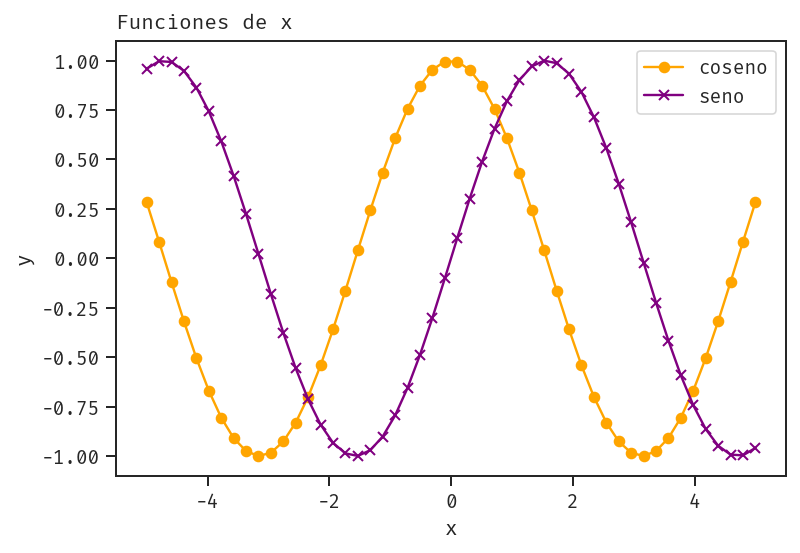

In [43]:
test_z = np.sin(test_x)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(test_x, test_y, '-o', color='orange', label='coseno')
ax.plot(test_x, test_z, '-x', color='purple', label='seno')
ax.set_title('Funciones de x', loc='left')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

Utilicemos la funcionalidad de `matplotlib` para sumergirnos en las siguientes preguntas.

#### ¿Existen diferencias en ocupación respecto a la edad?

Para responder esta pregunta necesitamos conocer la distribución de ocupaciones por cada edad, o bien, por cada año de nacimiento.

Consideremos solamente personas en edad de trabajar. Calculemos estas distribuciones con `pandas`:

In [44]:
ocupacion_edad = (personas
 # edad de trabajo
 [personas['AnoNac'].between(1931, 1995)]
 .groupby(['AnoNac', 'Ocupacion'])
 # total de personas, con expansión
 .agg(n_personas=('FactorPersona', 'sum'))
 # extraemos la serie n_personas del dataframe agrupado. es un poco redundante
 # si solo tenemos una columna. pero facilita las cosas
 ['n_personas']
 # convertimos los resultados en una tabla cuadrada, con una fila por año.
 .unstack(fill_value=0)
 # normalizamos cada fila
 .pipe(normalize_rows)
)

ocupacion_edad

Ocupacion,Empleado u obrero del sector privado,Empleado u obrero del sector público (Gob. Central o Municipal),Enpleado u obrero de empresas públicas,FF.AA. Y del Orden,Familiar no remunerado,Patrón o empleador,Servicio doméstico puertas adentro,Servicio doméstico puertas afuera,Trabajador por cuenta propia
AnoNac,,,,,,,,,
1931,0.164260,0.102121,0.000000,0.000000,0.000000,0.101588,0.092810,0.000000,0.539221
1932,0.196475,0.000000,0.000000,0.000000,0.000000,0.198978,0.003101,0.000000,0.601446
1933,0.198213,0.000000,0.000000,0.000000,0.000000,0.035488,0.000000,0.223672,0.542627
1934,0.382014,0.000000,0.000000,0.110518,0.000000,0.000000,0.000000,0.075264,0.432204
1935,0.396010,0.000000,0.076501,0.000000,0.000000,0.000000,0.149894,0.000000,0.377595
...,...,...,...,...,...,...,...,...,...
1991,0.831018,0.012973,0.015810,0.005487,0.000000,0.007560,0.006773,0.021159,0.099219
1992,0.873875,0.006969,0.054967,0.001655,0.000000,0.013924,0.000000,0.001982,0.046628
1993,0.850847,0.007310,0.013126,0.000511,0.000000,0.004409,0.001162,0.047874,0.074763


`pandas` tiene el método `plot.bar` que permite utilizar barras apiladas una sobre otra, donde cada barra es una columna. Se ve así:

<AxesSubplot:xlabel='AnoNac'>

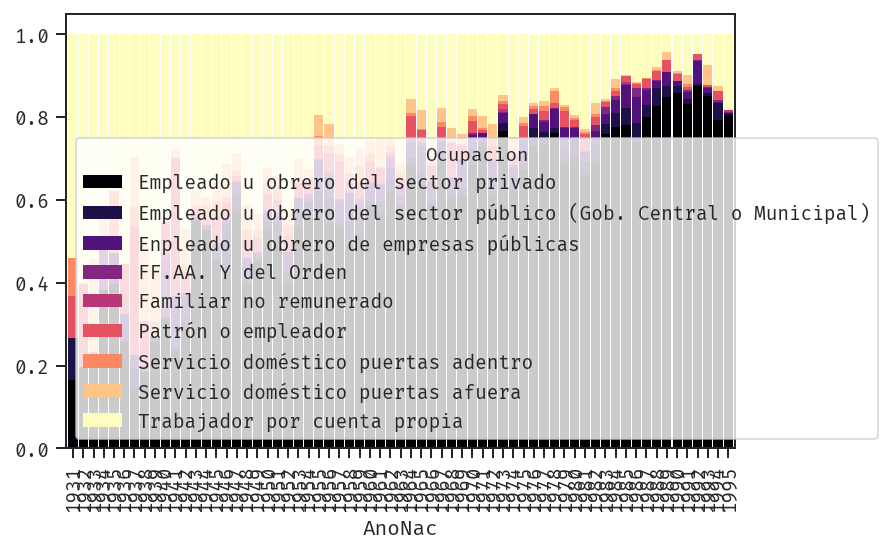

In [45]:
ocupacion_edad.plot.bar(stacked=True, width=0.9, edgecolor='none', cmap='magma')

No se ve bien. Necesitamos configurar y mejorar este gráfico. Utilicemos todo lo que tenemos a nuestro alcance:

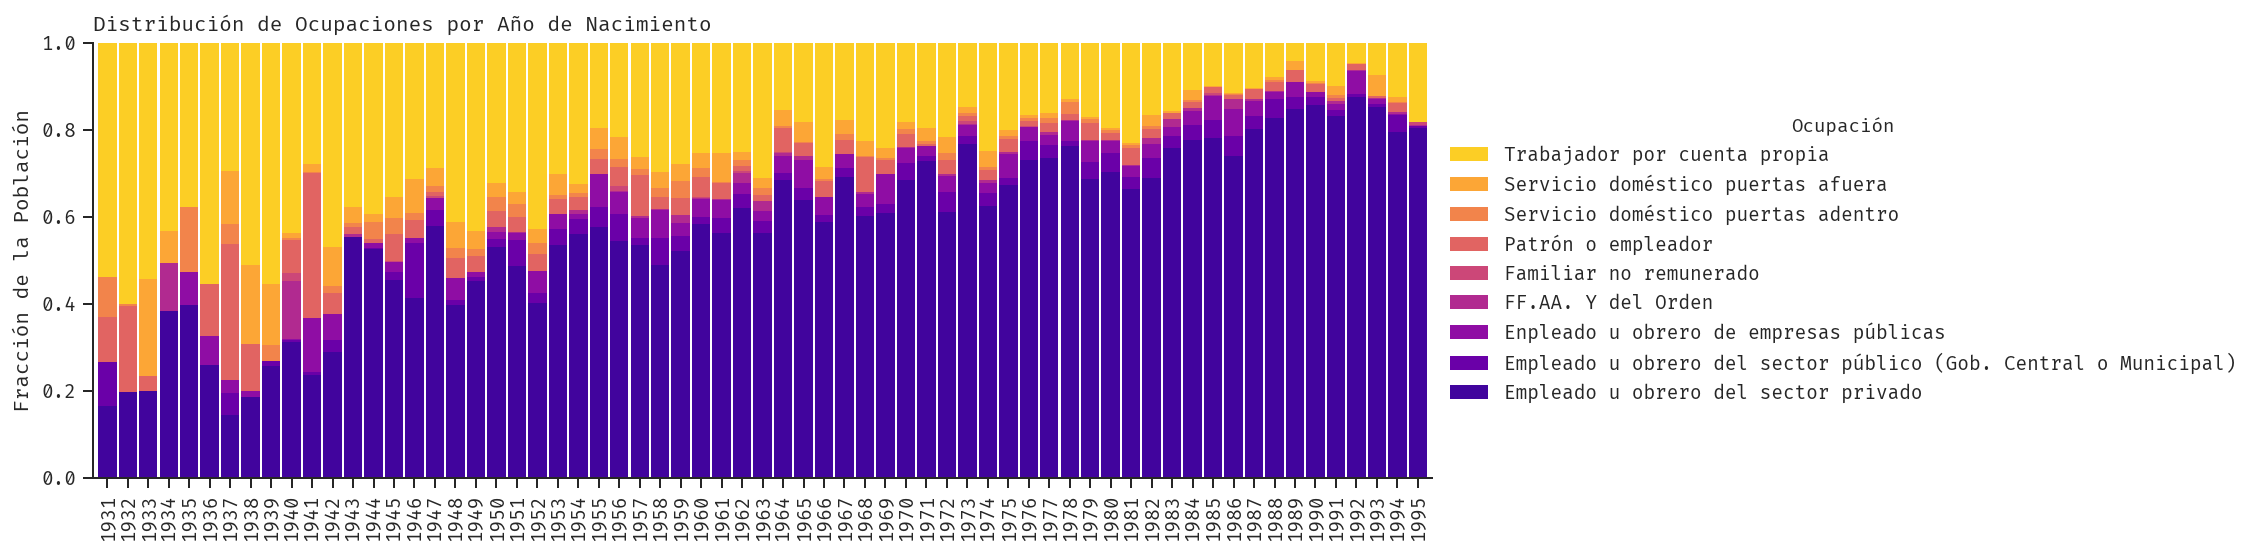

In [46]:
# creamos la figura con matplotlib. noten que es más ancha de lo normal.
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
 
# asignamos una paleta de colores a través de seaborn, que queda más bonito.
sns.set_palette('plasma', n_colors=len(ocupacion_edad.columns))

# llamamos al método plot.bar. recibe el eje de matplotlib como paramétro
ocupacion_edad.plot.bar(ax=ax, stacked=True, width=0.9, edgecolor='none')

# ¿notaron que la leyenda muestra los colores al revés que el gráfico?
# esto lo corrige
handles, labels = map(reversed, ax.get_legend_handles_labels())
ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.5), loc='center left', frameon=False, title='Ocupación')  

# títulos y límites para que se entienda lo que sucede
ax.set_title('Distribución de Ocupaciones por Año de Nacimiento', loc='left')
ax.set_ylim([0, 1])
ax.set_xlabel('')
ax.set_ylabel('Fracción de la Población')
sns.despine(ax=ax)

¡Mucho mejor! No solo podemos ver la distribución por año, también observamos que esta distribución cambia en el tiempo con una tendencia clara: a medida que la gente envejece, tiende a ser trabajador(a) por cuenta propia.

Podemos poner a prueba esta hipótesis de manera rápida con el método `lmplot` de `seaborn` (_linear model plot_), que mezcla un _scatterplot_ junto a una regresión lineal.

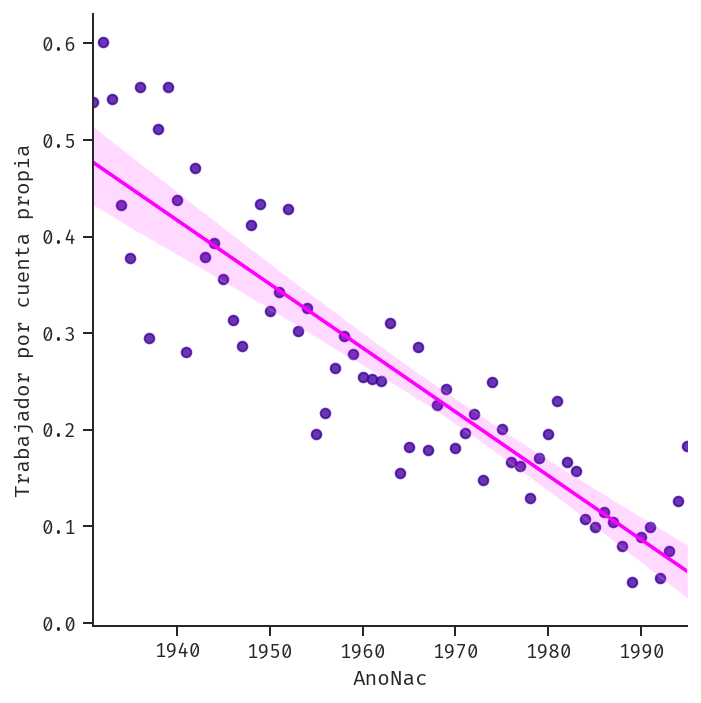

In [47]:
sns.lmplot('AnoNac', 'Trabajador por cuenta propia', ocupacion_edad.reset_index(), line_kws={'color': 'magenta'})

¡Bingo! En efecto hay una relación lineal muy fuerte en estas variables. ¿Les parece algo esperable?

Nota: `lmplot` espera las variables x e y de la tabla. El año de nacimiento era parte del índice de la tabla, no de las columnas, por ende, tuvimos que ejecutar `reset_index()` para mover el índice a una columna.

#### ¿Cuál es la distribución de uso de modo de transporte en viajes al trabajo?

Una pregunta relevante siempre. En tiempos de COVID-19 está en debate si el uso de transporte público es un foco de contagio. Entender la distribución de usos de transporte por comuna es importante para la definición de estrategias de desconfinamiento.

Primero, debemos calcular la distribución de uso de modos de transporte por comuna. Para ello utilizaremos las mismas operaciones que hemos visto hasta ahora: filtrar, `groupby`, `unstack`, `normalize_rows`. Pero esta vez la agregación del `groupby` será una función personalizada que calcula el total de los viajes, al multiplicar el factor de expansión de la persona y el factor de expansión del viaje (en día laboral):

In [48]:
modo_comuna = (viajes_persona_hogar
 [viajes_persona_hogar['Proposito'] == 'Al trabajo']
 .groupby(['Comuna', 'ModoDifusion'])
 .apply(lambda x: (x['FactorPersona'] * x['FactorLaboralNormal']).sum())
 .unstack(fill_value=0)
 .pipe(normalize_rows)
)

modo_comuna

ModoDifusion,Auto,Bicicleta,Bip!,Bip! - Otros Privado,Bip! - Otros Público,Caminata,Otros,Taxi,Taxi Colectivo
Comuna,,,,,,,,,
BUIN,0.148165,0.190694,0.000000,0.000000,0.032826,0.081227,0.223844,0.000000,0.323244
CALERA DE TANGO,0.258815,0.159247,0.000589,0.002567,0.033717,0.326050,0.172725,0.000000,0.046289
CERRILLOS,0.411375,0.027045,0.337099,0.004942,0.002291,0.092020,0.105321,0.000000,0.019907
CERRO NAVIA,0.253399,0.030099,0.490808,0.027176,0.011758,0.155826,0.023877,0.000000,0.007057
COLINA,0.247008,0.016766,0.000000,0.000000,0.118409,0.294914,0.301921,0.018470,0.002512
CONCHALI,0.209211,0.018652,0.568772,0.000000,0.053273,0.128508,0.016539,0.001632,0.003413
EL BOSQUE,0.362958,0.014986,0.326327,0.015789,0.025874,0.065404,0.158270,0.003984,0.026407
EL MONTE,0.373510,0.124207,0.007215,0.000000,0.075882,0.119216,0.220177,0.000000,0.079793
ESTACION CENTRAL,0.305073,0.097857,0.246768,0.003842,0.004430,0.317716,0.015494,0.000691,0.008128


Utilizaremos el mismo esquema del gráfico de la pregunta anterior. Aquí tenemos una diferencia: la variable del eje x es cualitativa, es una comuna. ¿Cómo la ordenamos? El orden de la tabla es semi-arbitrario. Podemos utilizar el método `sort_values` para darle un orden que tenga significado. En este caso, ordenamos de izquierda a derecha de acuerdo al uso de transporte privado (automóvil):

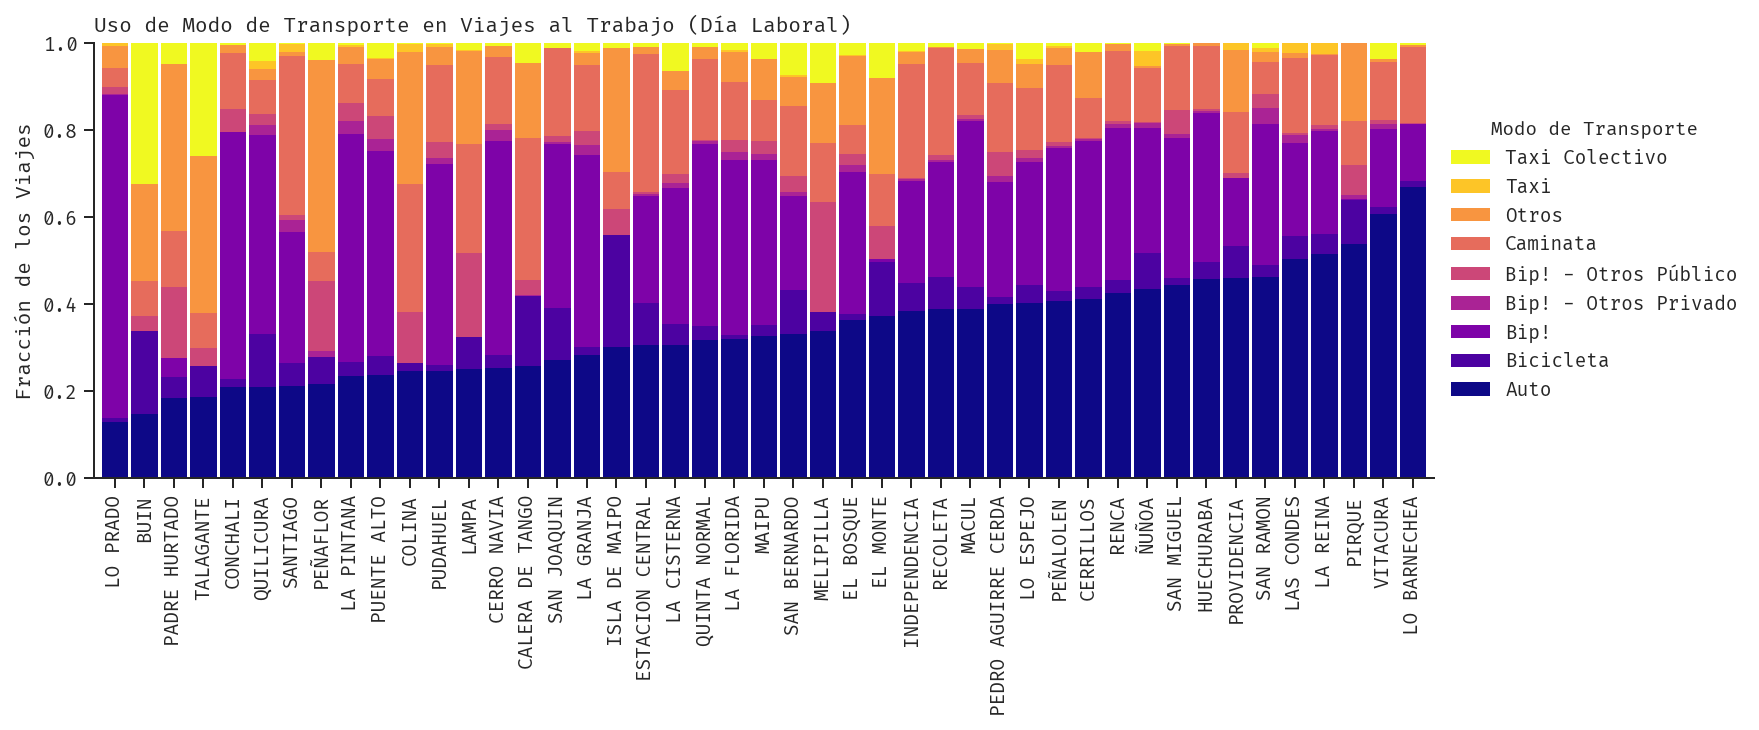

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
 
sns.set_palette('twilight', n_colors=len(modo_comuna.columns))

(modo_comuna
 .sort_values('Auto')
 .plot.bar(ax=ax, stacked=True, width=0.9, edgecolor='none', cmap='plasma')
)

handles, labels = map(reversed, ax.get_legend_handles_labels())
ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.5), loc='center left', frameon=False, title='Modo de Transporte')  

ax.set_title('Uso de Modo de Transporte en Viajes al Trabajo (Día Laboral)', loc='left')
ax.set_ylim([0, 1])
ax.set_xlabel('')
ax.set_ylabel('Fracción de los Viajes')
sns.despine(ax=ax)

¡Es un gráfico interesante! Verlo nos lleva a preguntarnos si existe una relación entre las propiedades de una comuna y su uso de transporte público.

Para ello calcularemos el ingreso promedio en cada comuna. Al igual que con los viajes, debemos utilizar el ingreso considerando los factores de expansión:

In [50]:
ingreso_por_comuna = (hogares
                      .groupby('Comuna')
                      .apply(lambda x: (x['FactorHogar'] * x['IngresoHogar']).sum() 
                                       / x['FactorHogar'].sum())
                      .rename('ingreso')
)

ingreso_por_comuna

Comuna
BUIN                   5.753514e+05
CALERA DE TANGO        5.059952e+05
CERRILLOS              5.287505e+05
CERRO NAVIA            4.213678e+05
COLINA                 6.552432e+05
CONCHALI               6.050698e+05
EL BOSQUE              5.143629e+05
EL MONTE               4.247368e+05
ESTACION CENTRAL       4.832393e+05
HUECHURABA             7.918456e+05
INDEPENDENCIA          6.057736e+05
ISLA DE MAIPO          4.074196e+05
LA CISTERNA            6.160750e+05
LA FLORIDA             7.147872e+05
LA GRANJA              5.591557e+05
LA PINTANA             4.193542e+05
LA REINA               1.521881e+06
LAMPA                  6.482933e+05
LAS CONDES             1.460452e+06
LO BARNECHEA           2.182363e+06
LO ESPEJO              4.978187e+05
LO PRADO               4.596349e+05
MACUL                  7.739653e+05
MAIPU                  5.953841e+05
MELIPILLA              4.594306e+05
PADRE HURTADO          4.827470e+05
PEDRO AGUIRRE CERDA    5.462924e+05
PEÑAFLOR             

Ahora que tenemos esta serie, podemos hacer un cruce entre las dos tablas que hemos calculado:

In [51]:
modo_comuna_ingreso = modo_comuna.join(ingreso_por_comuna)

Un gráfico que se suele usar para ver relaciones es el _scatterplot_. `pandas` incluye un método `plot.scatter` que se puede utilizar directamente:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='ingreso', ylabel='Bip!'>

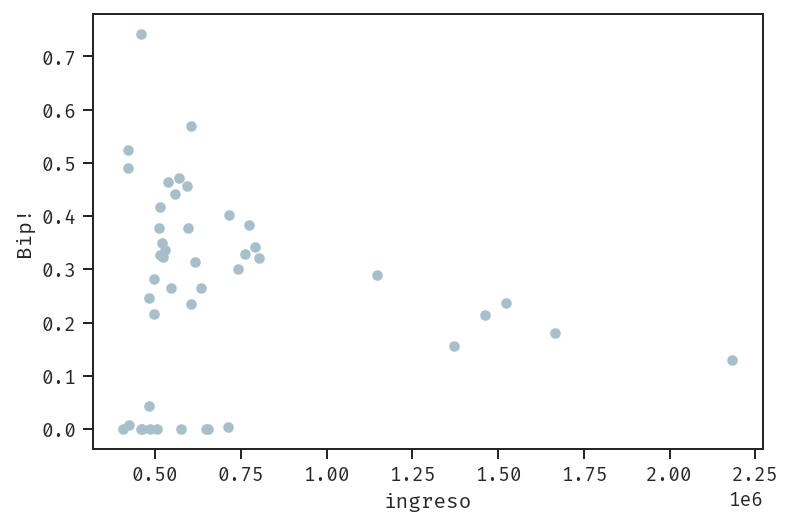

In [52]:
modo_comuna_ingreso.plot.scatter(x='ingreso', y='Bip!')

Más que una relación específica, pareciera haber grupos de comunas. Pero quisiéramos saber _cuáles_ son las integrantes de cada grupo. Quisiéramos agregar el nombre de las comunas al gráfico. Podemos hacerlo con el siguiente código que utiliza funciones de `matplotlib` y `pandas`:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


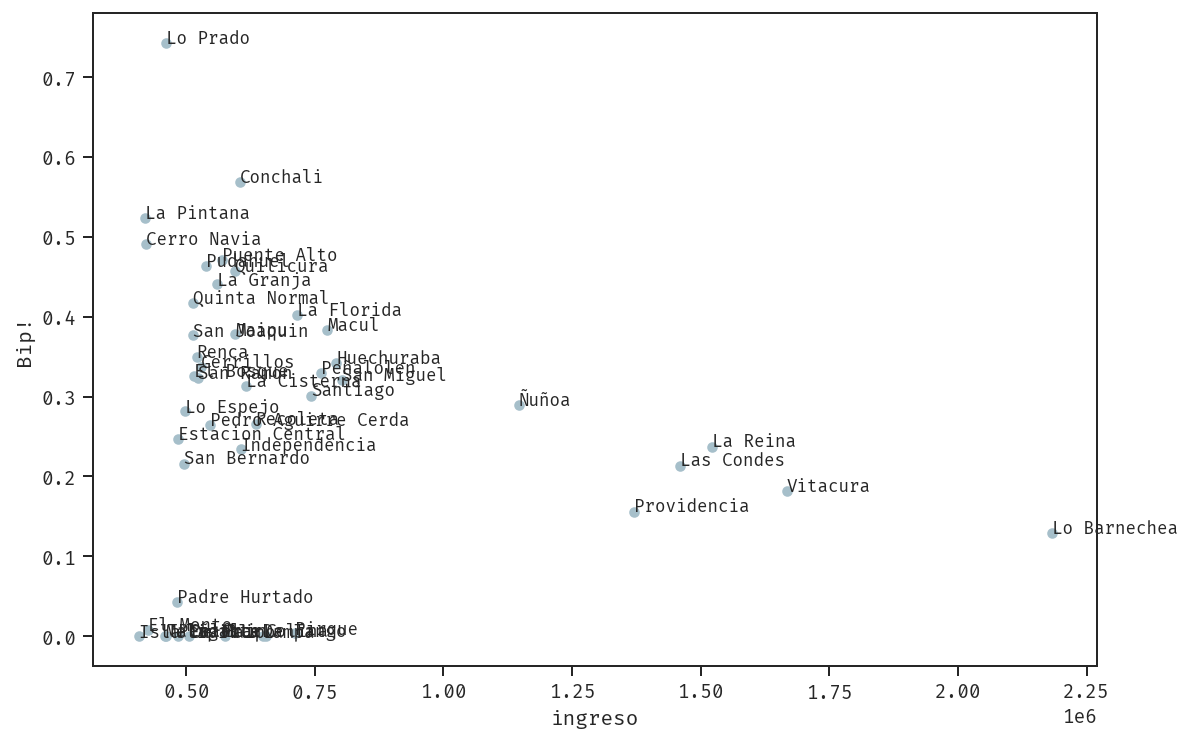

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

modo_comuna_ingreso.plot.scatter(x='ingreso', y='Bip!', ax=ax)

for index, row in modo_comuna_ingreso.iterrows():
    ax.annotate(index.title(), (row['ingreso'], row['Bip!']), fontsize='small')

¡Funciona! Pero surgió otro problema: las etiquetas de texto se sobreponen entre sí. 

Afortunadamente la función `adjust_text`, de una biblioteca externa llamada `adjustText`, nos puede ayudar:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


50

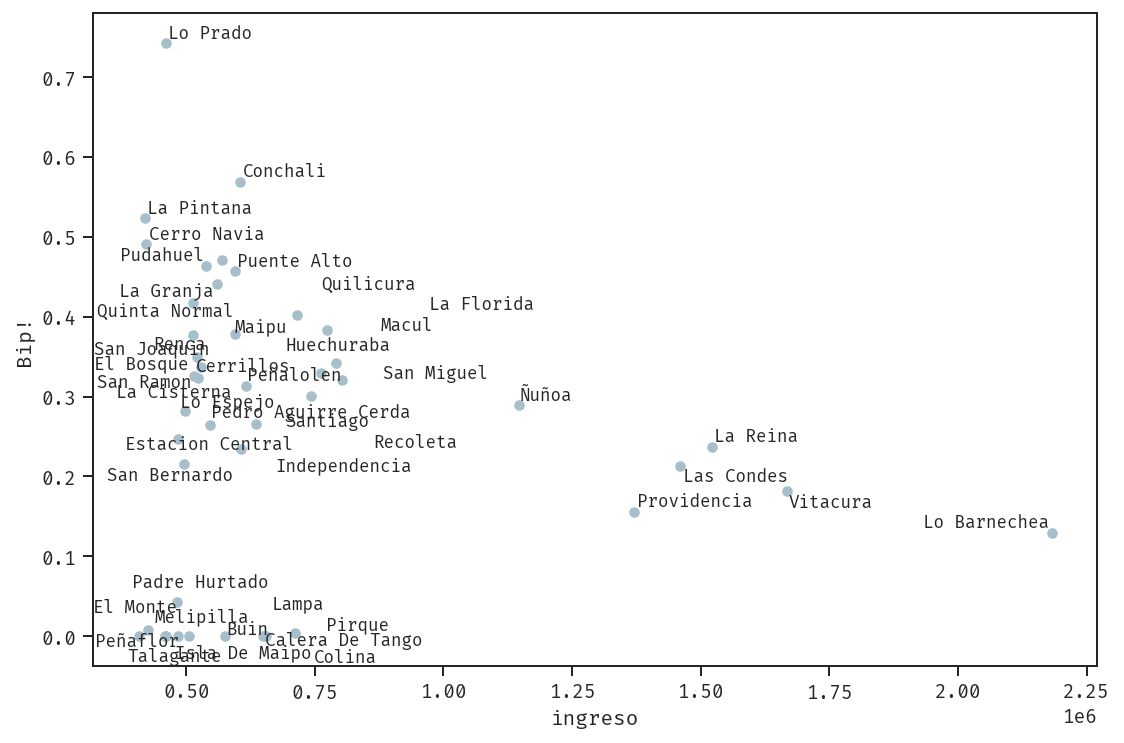

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

modo_comuna_ingreso.plot.scatter(x='ingreso', y='Bip!', ax=ax)

labels = []

for index, row in modo_comuna_ingreso.iterrows():
    text = ax.annotate(index.title(), (row['ingreso'], row['Bip!']), fontsize='small')
    labels.append(text)
    
adjust_text(labels, ax=ax, lim=50)

¡No está mal! El parámetro `lim=50` indica cuánto se esfuerza el método en separar las etiquetas. Un valor más alto entregará mejores resultados.

Ahora podemos configurar el resto de la apariencia del gráfico para tener una buena visualización:

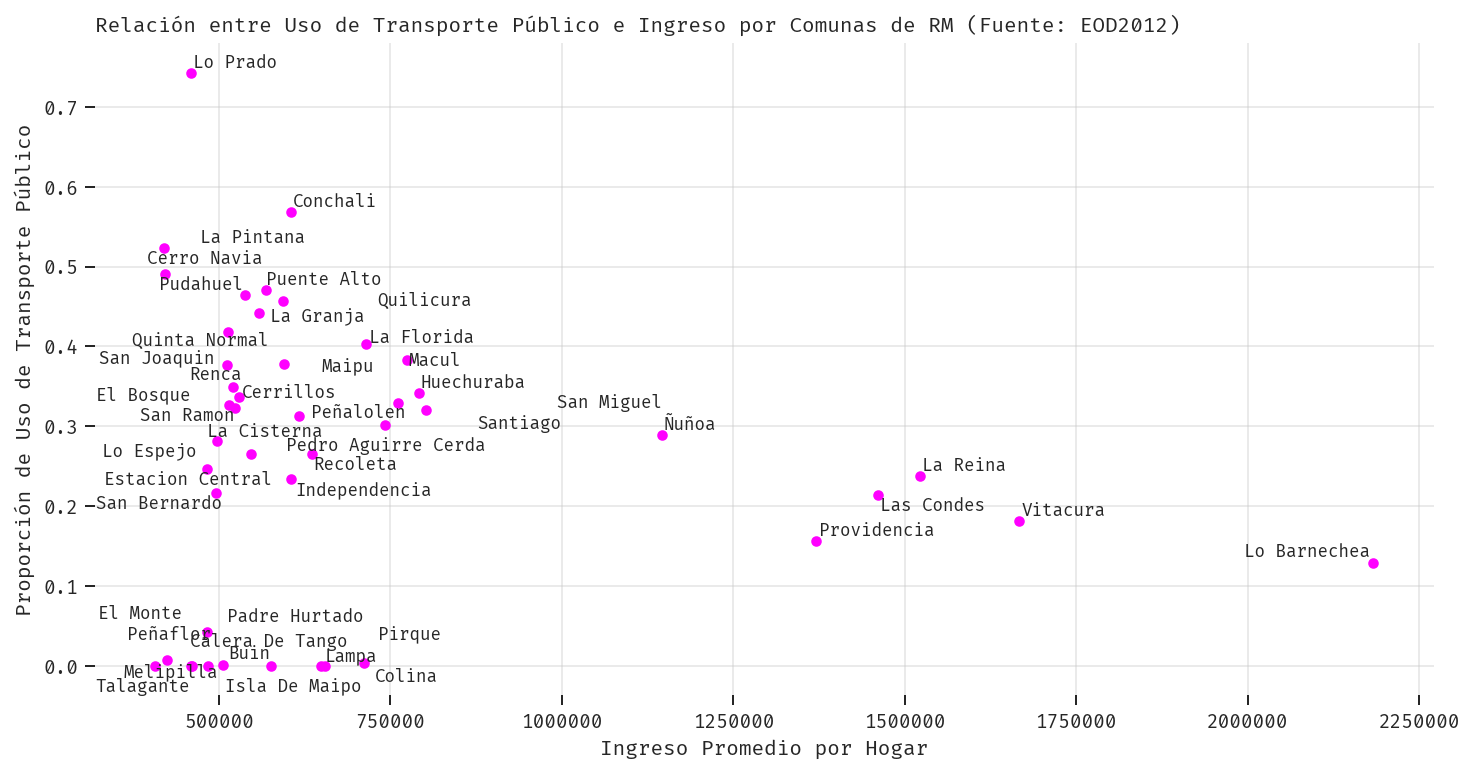

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

modo_comuna_ingreso.plot.scatter(x='ingreso', y='Bip!', color='magenta', ax=ax)

# accedemos a los datos en pandas y usamos código de matplotlib
labels = []

for index, row in modo_comuna_ingreso.iterrows():
    text = ax.annotate(index.title(), (row['ingreso'], row['Bip!']), fontsize='small')
    labels.append(text)
    
# esta biblioteca externa nos ayuda a darle legibilidad al texto
adjust_text(labels, ax=ax, lim=50)

# usamos matplotlib para configurar el gráfico
ax.set_xlabel('Ingreso Promedio por Hogar')
ax.set_ylabel('Proporción de Uso de Transporte Público')
ax.set_title('Relación entre Uso de Transporte Público e Ingreso por Comunas de RM (Fuente: EOD2012)', loc='left')
ax.grid(alpha=0.5)
# esto quita la notación científica
ax.ticklabel_format(style='plain')

# con un poco de ayuda de seaborn
sns.despine(ax=ax, left=True, bottom=True, right=True, top=True)

Con esto queda claro que los tres grupos de uso de transporte público son: las comunas fuera del radio urbano (esquina inferior izquierda), que no son más ricas que el resto y no usan transantiago porque no llega a ellas; las comunas ricas (inferior derecha), que casi no usan transporte público a pesar de estar bien conectadas; y el resto, que presenta tasas variables de uso de transporte público.

---
  
## Conclusiones

Con estas herramientas podemos explorar las relaciones que hay entre las variables de nuestro dataset. La mayor dificultad no está en _implementar_ las visualizaciones, sino en, primero, **saber qué preguntarle a los datos**, y segundo, **elegir los métodos adecuados para responder la pregunta**. Probablemente `seaborn`, `pandas` o `matplotlib` tienen dicha solución implementada, o al menos a unos pasos de ser implementada.

El siguiente paso que les recomiendo es entender como se comportan estos métodos con otras variables del dataset. También hemos probado distintos valores para atributos de apariencia, como los tamaños de figura y las paletas de colores.

Una dificultad que van a encontrar es que no existen estándares para nombrar a los métodos y sus parámetros. Por ejemplo, el parámetro de la paleta de colores se suele llamar `cmap` en `matplotlib` y `pandas`, pero se llama `palette` en casi todos los métodos de `seaborn` --- digo casi todos porque algunos también usan `cmap`. Esto puede ser confuso para aprender, y creo que de momento no hay una solución más que ejercitar y aprenderse los nombres de parámetros y de métodos que sean más adecuados para lo que deban hacer.
